<a href="https://colab.research.google.com/github/utkarsh0702/Tensorflow/blob/master/TensorFlow6_Sentimental_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import pandas as pd
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
data= open('/content/sentiment.tsv').readlines()
print(data[1])

pos	having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband, sans kiddos 



In [0]:
tweet=[]
sentiment=[]
for item in data:
  sentiment.append(item[:3])
  tweet.append(item[4:])
print(tweet[1])
print(sentiment)
final_sentiment= [ 0 if x=='neg' else 1 for x in sentiment]
print(len(final_sentiment))

having a vodka tonic and looking forward to going to Saddle Ranch at the Westgate with the husband, sans kiddos 

['neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'pos', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'pos', 'neg', 'pos', 'neg', 'pos', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'neg', 'pos', 'pos', 'neg', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'po

In [0]:
import numpy as np

train_tweet= tweet[:1650]
test_tweet= tweet[1650:]
train_sentiment= final_sentiment[:1650]
test_sentiment= final_sentiment[1650:]
train_sent= np.array(train_sentiment)
test_sent= np.array(test_sentiment)

In [0]:
#Hyperparameters
vocab_size= 1000
embedding_dim=16
max_length=16
trunc_type='post'
oov_tok= '<OOV>'


token= Tokenizer(num_words=vocab_size, oov_token= oov_tok)
token.fit_on_texts(train_tweet)
word_index= token.word_index
print(word_index)
print('Number of tokens generated are:', len(word_index))
#for training data
sequences= token.texts_to_sequences(train_tweet)
padded= pad_sequences(sequences, maxlen=max_length,padding='post', truncating=trunc_type)
#for testing data
test_sequences= token.texts_to_sequences(test_tweet)
test_padded= pad_sequences(test_sequences,padding='post', maxlen=max_length)

{'<OOV>': 1, 'i': 2, 'to': 3, 'the': 4, 'a': 5, 'my': 6, 'and': 7, 'you': 8, 'for': 9, 'is': 10, 'it': 11, 'in': 12, 'of': 13, 'me': 14, 'on': 15, 'that': 16, 'so': 17, 'have': 18, 'but': 19, 'just': 20, "i'm": 21, 'not': 22, 'be': 23, 'was': 24, 'at': 25, 'now': 26, 'with': 27, 'this': 28, 'up': 29, 'today': 30, 'out': 31, 'good': 32, 'quot': 33, 'too': 34, 'are': 35, 'no': 36, 'get': 37, 'your': 38, 'im': 39, 'like': 40, 'love': 41, 'http': 42, 'got': 43, "it's": 44, 'all': 45, 'about': 46, 'going': 47, 'back': 48, 'one': 49, 'lol': 50, 'work': 51, 'do': 52, 'day': 53, 'go': 54, 'time': 55, 'am': 56, 'really': 57, 'from': 58, 'what': 59, 'u': 60, 'will': 61, "don't": 62, 'com': 63, 'amp': 64, 'we': 65, 'thanks': 66, '2': 67, 'night': 68, 'some': 69, 'new': 70, 'off': 71, 'know': 72, 'if': 73, 'had': 74, 'her': 75, 'its': 76, 'here': 77, 'oh': 78, 'see': 79, 'they': 80, 'think': 81, '3': 82, 'or': 83, 'can': 84, 'miss': 85, 'how': 86, 'been': 87, 'want': 88, 'as': 89, 'much': 90, 'mor

In [0]:
#Model with two bidirectional LSTM
model= tf.keras.Sequential([
                            tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length= max_length),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                            tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, dropout=0.2)),
                            tf.keras.layers.Dense(1, activation='sigmoid')
])
adam= tf.keras.optimizers.Adam(lr=0.01)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=[tf.keras.metrics.AUC()])
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 16, 16)            16000     
_________________________________________________________________
bidirectional_6 (Bidirection (None, 16, 128)           41472     
_________________________________________________________________
bidirectional_7 (Bidirection (None, 64)                41216     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 65        
Total params: 98,753
Trainable params: 98,753
Non-trainable params: 0
_________________________________________________________________


In [0]:
history=model.fit(padded,
          train_sent,
          epochs=100,
          validation_data=(test_padded, test_sent))

Epoch 1/100
52/52 [==============================] - 2s 31ms/step - loss: 0.6590 - auc_3: 0.6315 - val_loss: 0.6690 - val_auc_3: 0.7069
Epoch 2/100
52/52 [==============================] - 1s 11ms/step - loss: 0.5370 - auc_3: 0.8050 - val_loss: 0.6469 - val_auc_3: 0.6727
Epoch 3/100
52/52 [==============================] - 1s 11ms/step - loss: 0.4351 - auc_3: 0.8830 - val_loss: 0.7963 - val_auc_3: 0.6901
Epoch 4/100
52/52 [==============================] - 1s 11ms/step - loss: 0.3882 - auc_3: 0.9067 - val_loss: 0.8281 - val_auc_3: 0.6876
Epoch 5/100
52/52 [==============================] - 1s 11ms/step - loss: 0.2930 - auc_3: 0.9460 - val_loss: 0.8311 - val_auc_3: 0.6761
Epoch 6/100
52/52 [==============================] - 1s 11ms/step - loss: 0.2220 - auc_3: 0.9675 - val_loss: 1.1025 - val_auc_3: 0.6914
Epoch 7/100
52/52 [==============================] - 1s 11ms/step - loss: 0.2031 - auc_3: 0.9732 - val_loss: 1.1116 - val_auc_3: 0.6647
Epoch 8/100
52/52 [=============================

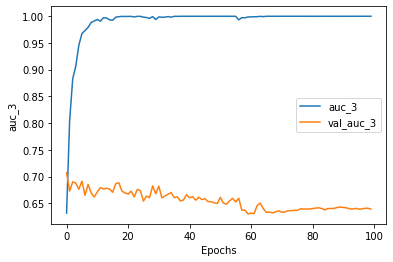

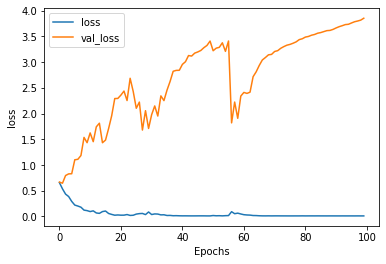

In [0]:
import matplotlib.pyplot as plt

def plot_graph(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history["val_"+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string,"val_"+string])
  plt.show()

plot_graph(history, "auc_3")
plot_graph(history, "loss")